In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = "../data/42/capture20110810.binetflow"
df = pd.read_csv(file_path)

In [3]:
# Display basic information
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824636 entries, 0 to 2824635
Data columns (total 15 columns):
 #   Column     Dtype  
---  ------     -----  
 0   StartTime  object 
 1   Dur        float64
 2   Proto      object 
 3   SrcAddr    object 
 4   Sport      object 
 5   Dir        object 
 6   DstAddr    object 
 7   Dport      object 
 8   State      object 
 9   sTos       float64
 10  dTos       float64
 11  TotPkts    int64  
 12  TotBytes   int64  
 13  SrcBytes   int64  
 14  Label      object 
dtypes: float64(3), int64(3), object(9)
memory usage: 323.3+ MB
None

First few rows:
                    StartTime          Dur Proto        SrcAddr  Sport    Dir  \
0  2011/08/10 09:46:53.047277  3550.182373   udp  212.50.71.179  39678    <->   
1  2011/08/10 09:46:53.048843     0.000883   udp  84.13.246.132  28431    <->   
2  2011/08/10 09:46:53.049895     0.000326   tcp  217.163.21.35     80    <?>   
3  2011/08/10 09:46:53.053771     0.056966   tcp     83

In [4]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                Dur          sTos          dTos       TotPkts      TotBytes  \
count  2.824636e+06  2.814046e+06  2.629446e+06  2.824636e+06  2.824636e+06   
mean   4.322060e+02  2.786664e-02  4.430591e-04  2.547990e+01  1.929134e+04   
std    9.958423e+02  2.220372e+00  3.332693e-02  3.124788e+03  3.212186e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  6.000000e+01   
25%    3.130000e-04  0.000000e+00  0.000000e+00  2.000000e+00  2.140000e+02   
50%    1.194000e-03  0.000000e+00  0.000000e+00  2.000000e+00  2.610000e+02   
75%    9.012607e+00  0.000000e+00  0.000000e+00  4.000000e+00  5.880000e+02   
max    3.600031e+03  1.920000e+02  3.000000e+00  2.686731e+06  2.689640e+09   

           SrcBytes  
count  2.824636e+06  
mean   4.155290e+03  
std    1.858530e+06  
min    0.000000e+00  
25%    7.800000e+01  
50%    8.300000e+01  
75%    2.610000e+02  
max    2.635366e+09  


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
StartTime         0
Dur               0
Proto             0
SrcAddr           0
Sport          9379
Dir               0
DstAddr           0
Dport          4390
State             1
sTos          10590
dTos         195190
TotPkts           0
TotBytes          0
SrcBytes          0
Label             0
dtype: int64


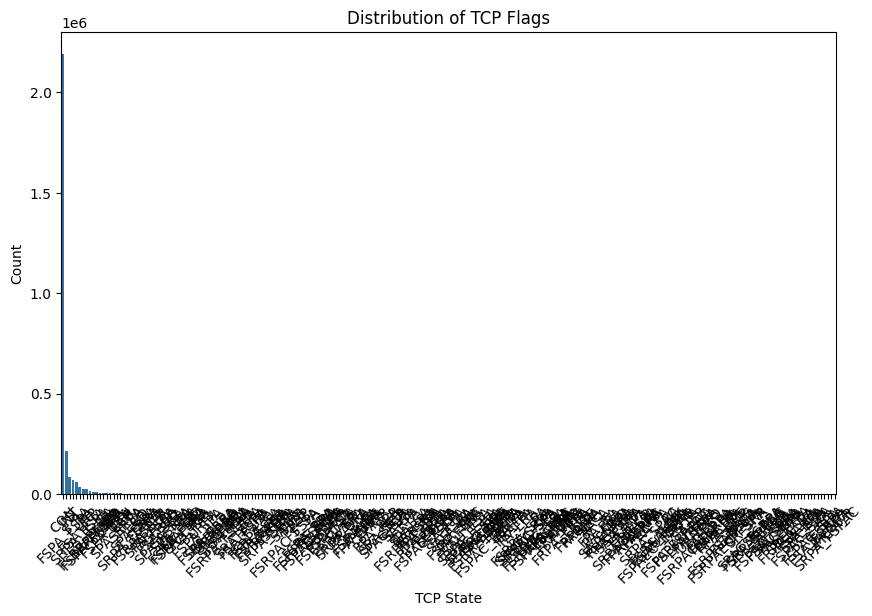

In [6]:
# Distribution of TCP Flags
plt.figure(figsize=(10, 6))
sns.countplot(x='State', data=df, order=df['State'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of TCP Flags")
plt.xlabel("TCP State")
plt.ylabel("Count")
plt.show()

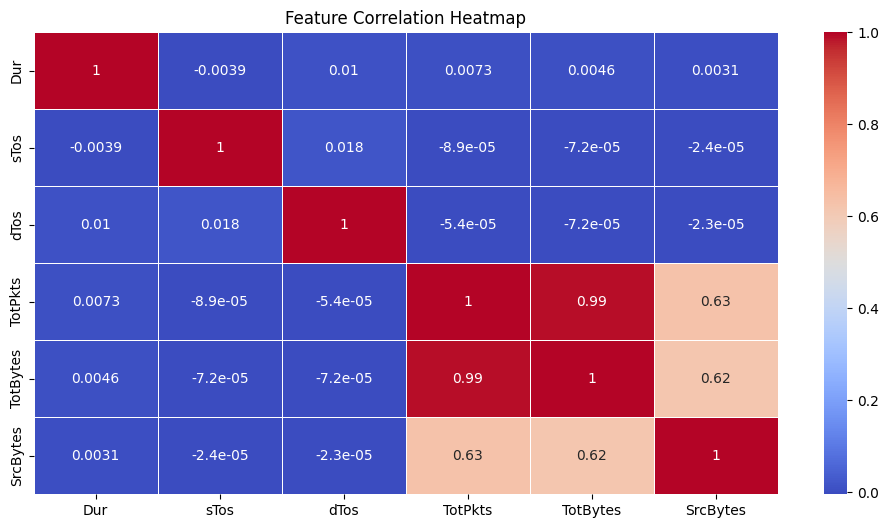

In [10]:
# Convert timestamps to datetime (if necessary)
df['StartTime'] = pd.to_datetime(df['StartTime'], errors='coerce')

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Now generate the correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [12]:
import os

# Define the directory path
processed_dir = "../data/processed"

# Create the directory if it does not exist
os.makedirs(processed_dir, exist_ok=True)

# Now save the CSV file
df.to_csv(os.path.join(processed_dir, "analyzed_data_42.csv"), index=False)

print("Exploratory Analysis Completed! File saved successfully.")


Exploratory Analysis Completed! File saved successfully.
